# Exploratory Data Analysis

## Import dependencies

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df = pd.read_csv('../data/customers_100k.csv', sep='|') 

In [3]:
df.head(10)

account_id country_name account_category  \
0  ac6a99474410f1c59c91da3f0cf9cf3f        Tonga         Standard   
1  1cc66628ed41f3db5a55195e93277a04   Costa Rica         Standard   
2  db5f3cdd5629b9591b720b9b7e077df2   Costa Rica         Standard   
3  bebb4028688f519f36ed220855b0a62f   Costa Rica         Standard   
4  507c0bfb67895d773e3f8bd33b861d09   Costa Rica         Standard   
5  b1267a5b953b7267de811510f838172b   Costa Rica         Standard   
6  3315ad169d4d2e9080f1377c44377c7c   Costa Rica         Standard   
7  8ca7b69eda1a06b32e60fff1c6db3b28   Costa Rica         Standard   
8  5bd2eea4e2320b9246b41a8f54fb02d2   Costa Rica              SMB   
9  bbfb03bca60fb0185be3f36d12c99b3f   Costa Rica         Standard   

  bi_account_classification      customer_type    region  sic_code  \
0              Inside Sales           Customer      APAC      7381   
1              Inside Sales           Customer  AMERICAS      5049   
2              Inside Sales           Customer  AMERICAS      7389   
3                  Reseller  End-User Reseller  AMERICAS      8711   
4              Inside Sales           Customer  AMERICAS      6531   
5              Inside Sales           Customer  AMERICAS      5943   
6                  Reseller           Reseller  AMERICAS      7378   
7              Inside Sales           Customer  AMERICAS         1   
8              Inside Sales           Customer  AMERICAS      8111   
9              Inside Sales           Customer  AMERICAS      8731   

   employee_number  revenue_in_eur  number_distinct_active_licenses  ...  \
0                8       1502000.0                                1  ...   
1               11       1814000.0                                1  ...   
2               16      13444000.0                                1  ...   
3               36       7066000.0                                3  ...   
4              312      61054000.0                                2  ...   
5               25       4881000.0                                1  ...   
6               15       3013000.0                                9  ...   
7              717     159214000.0                                1  ...   
8                5        934000.0                                3  ...   
9               22       4308000.0                                2  ...   

  total_connections_12m  total_endpoints_12m  total_devices_12m  \
0                    54                    4                  2   
1                  3385                  158                 51   
2                    12                    2                  2   
3                  1724                  206                 30   
4                  6493                  611                 31   
5                   583                    3                  5   
6                  2181                  311                  7   
7                  2415                  244                  4   
8                 22037                 3766               1311   
9                  4064                  672                 15   

   last_invoice_date_created current_sales_channel age_customer  \
0        2023-11-23 01:57:47               Webshop            6   
1        2023-10-07 19:35:11               Webshop            1   
2        2023-12-02 02:03:05               Webshop            2   
3        2023-10-25 23:32:46          Inside Sales            7   
4        2023-11-17 04:16:51          Inside Sales           10   
5        2023-08-21 01:11:38               Webshop            5   
6        2023-09-28 04:27:43              Reseller            7   
7        2023-12-22 06:27:18                 Other           12   
8        2023-09-22 01:48:17          Inside Sales            9   
9        2023-12-20 01:21:26          Inside Sales           15   

   number_renewals  account_value_in_eur  billings_ltm_prorated  \
0                5               2532.84                 466.47   
1                0               1298.15       

## Variable Description

* **account_id**: Masked customer ID in TeamViewer.
* **country_name**: Name of the country.
* **account_category**: Characterization of the account.
* **bi_account_classification**: Internal classification of the account.
* **customer_type**: Type of customer.
* **region**: AMS, EMEA or APAC.
* **sic_code**: 4-digit code that describes the customer's business type.
* **employee_number**: Number of employees of the company.
* **revenue_in_eur**: Reported revenue generated by the company in EUR.
* **number_distinct_active_licenses**: Total Number of distinct and active licenses.
* **major_edition**: Type of license purchased.
* **total_connections_12m**: Total number of connections in the last 12 months.
* **total_endpoints_12m**: Total number of endpoints connected in the last 12 months.
* **total_devices_12m**: Total number of devices connected in the last 12 months.
* **last_invoice_date_created**: Date of the last invoice.
* **current_sales_channel**: Sales Channel used.
* **age_customer**: Age of the customer with TV.
* **number_renewals**: Number of times the customer renewed the contract.
* **account_value_in_eur**: Customer value for TV in EUR.
* **billings_ltm_prorated**: Annual contract value for the last 12 months.
* **business_model**: Subscription or Perpetual.

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   account_id                       100000 non-null  object 
 1   country_name                     100000 non-null  object 
 2   account_category                 100000 non-null  object 
 3   bi_account_classification        100000 non-null  object 
 4   customer_type                    100000 non-null  object 
 5   region                           100000 non-null  object 
 6   sic_code                         100000 non-null  int64  
 7   employee_number                  100000 non-null  int64  
 8   revenue_in_eur                   100000 non-null  float64
 9   number_distinct_active_licenses  100000 non-null  int64  
 10  major_edition                    100000 non-null  object 
 11  total_connections_12m            100000 non-null  int64  
 12  tot

In [5]:
df.describe()

sic_code  employee_number  revenue_in_eur  \
count  100000.000000    100000.000000    1.000000e+05   
mean     5879.682920       297.198880    1.253197e+08   
std      2280.167339      4463.491202    2.653859e+09   
min         1.000000         1.000000    1.000000e+00   
25%      4731.000000         3.000000    2.248878e+05   
50%      6512.000000         8.000000    1.143722e+06   
75%      7389.000000        30.000000    5.288708e+06   
max      9999.000000    543000.000000    4.408149e+11   

       number_distinct_active_licenses  total_connections_12m  \
count                     100000.00000           1.000000e+05   
mean                           1.64531           1.834676e+03   
std                            1.29076           9.158201e+03   
min                            1.00000           1.000000e+00   
25%                            1.00000           1.140000e+02   
50%                            1.00000           4.160000e+02   
75%                            2.00000           1.377000e+03   
max                          155.00000           1.140462e+06   

       total_endpoints_12m  total_devices_12m   age_customer  number_renewals  \
count        100000.000000      100000.000000  100000.000000    100000.000000   
mean            187.814590          21.411450       6.422390         3.781310   
std             751.854495         117.205407       3.901829         3.359553   
min               1.000000           1.000000       1.000000         0.000000   
25%               6.000000           2.000000       3.000000         2.000000   
50%              30.000000           5.000000       5.000000         4.000000   
75%             138.000000          15.000000       9.000000         5.000000   
max           78107.000000       13094.000000      18.000000       212.000000   

       account_value_in_eur  billings_ltm_prorated  
count          1.000000e+05          100000.000000  
mean           5.449461e+03            1087.345111  
std            1.737684e+04            4750.485586  
min            0.000000e+00               1.000000  
25%            1.275970e+03             349.710000  
50%            2.483385e+03             520.500000  
75%            6.218025e+03            1199.000000  
max            2.352140e+06          694803.410000

## Data Cleaning

In [6]:
df.isnull().sum()

account_id                         0
country_name                       0
account_category                   0
bi_account_classification          0
customer_type                      0
region                             0
sic_code                           0
employee_number                    0
revenue_in_eur                     0
number_distinct_active_licenses    0
major_edition                      0
total_connections_12m              0
total_endpoints_12m                0
total_devices_12m                  0
last_invoice_date_created          0
current_sales_channel              0
age_customer                       0
number_renewals                    0
account_value_in_eur               0
billings_ltm_prorated              0
business_model                     0
dtype: int64

Fortunately, this dataset contains no missing values. We’ll use visualization methods to look for trends and outliers in our collected data.

In [7]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [account_id, country_name, account_category, bi_account_classification, customer_type, region, sic_code, employee_number, revenue_in_eur, number_distinct_active_licenses, major_edition, total_connections_12m, total_endpoints_12m, total_devices_12m, last_invoice_date_created, current_sales_channel, age_customer, number_renewals, account_value_in_eur, billings_ltm_prorated, business_model]
Index: []

[0 rows x 21 columns]

As the above result, there are no duplicated values in our dataset.

## Data Visualization

In order to optimize the visualization process, we will be taken a 10k sample out of the dataset.

In [35]:
sample_df = df.sample(n=10000, random_state=123)

### Univariate Analysis

#### Numerical features

In [36]:
sample_df.describe().columns

Index(['sic_code', 'employee_number', 'revenue_in_eur',
       'number_distinct_active_licenses', 'total_connections_12m',
       'total_endpoints_12m', 'total_devices_12m', 'age_customer',
       'number_renewals', 'account_value_in_eur', 'billings_ltm_prorated'],
      dtype='object')

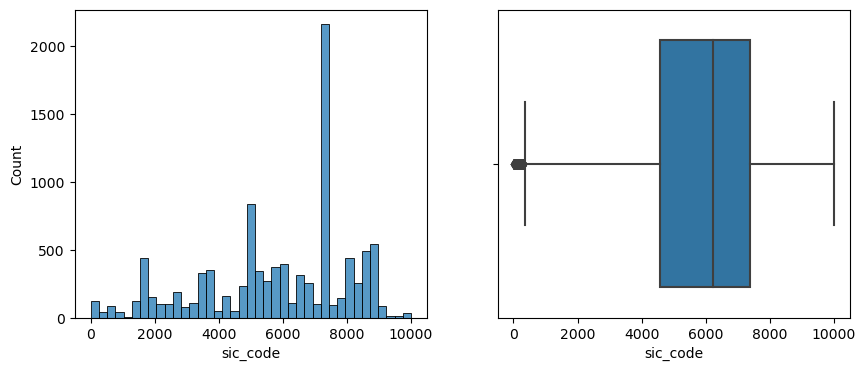

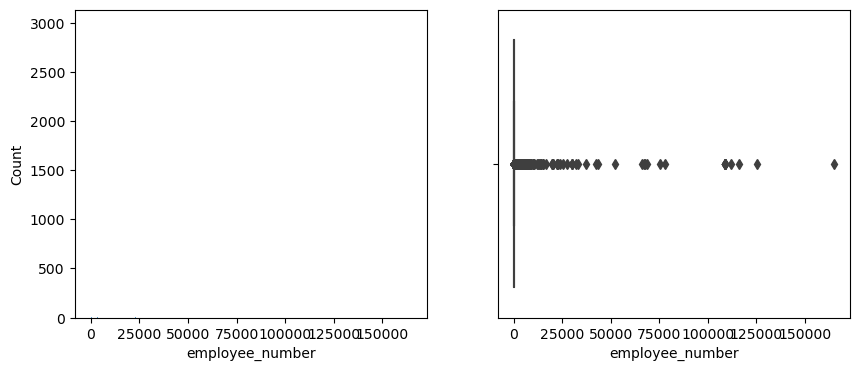

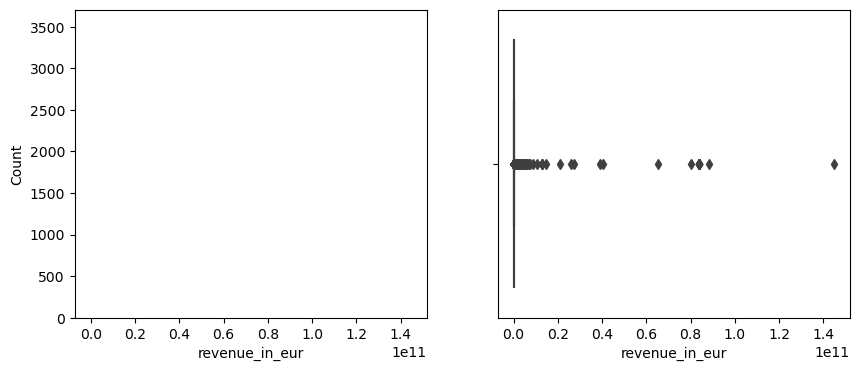

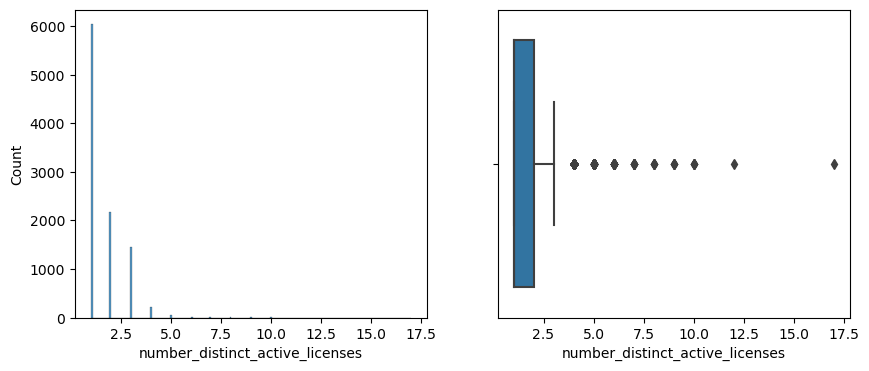

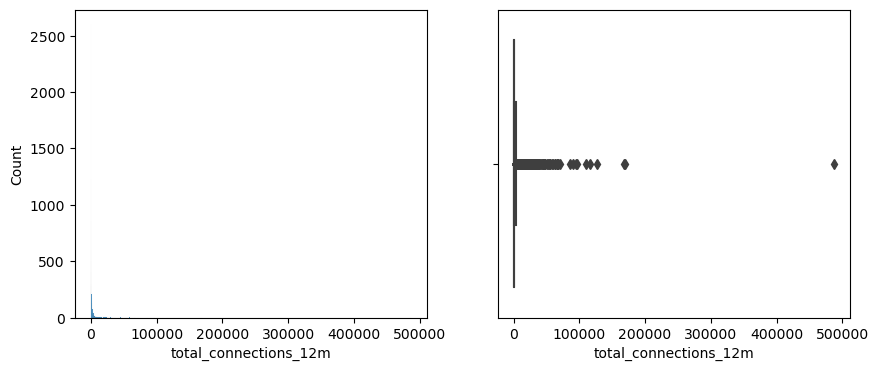

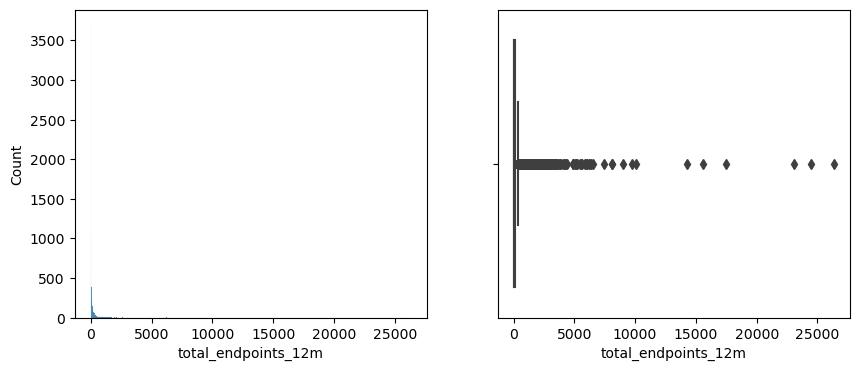

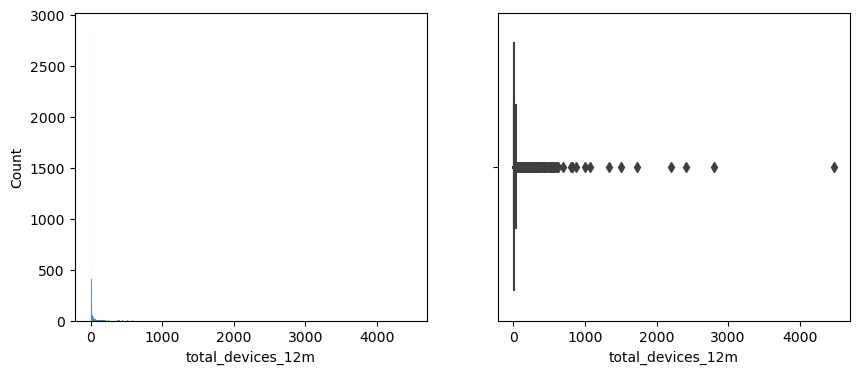

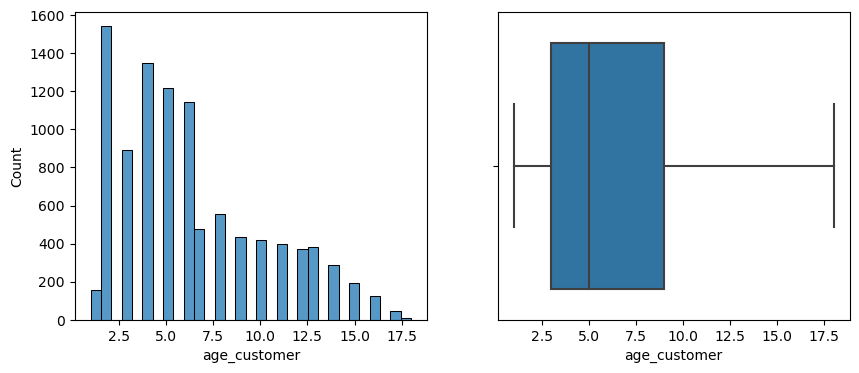

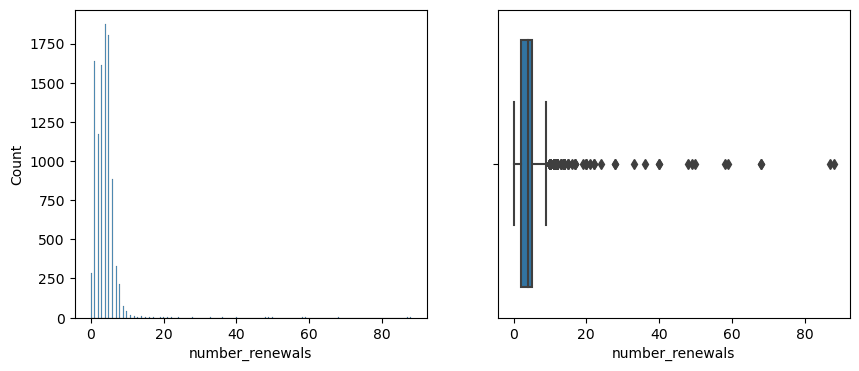

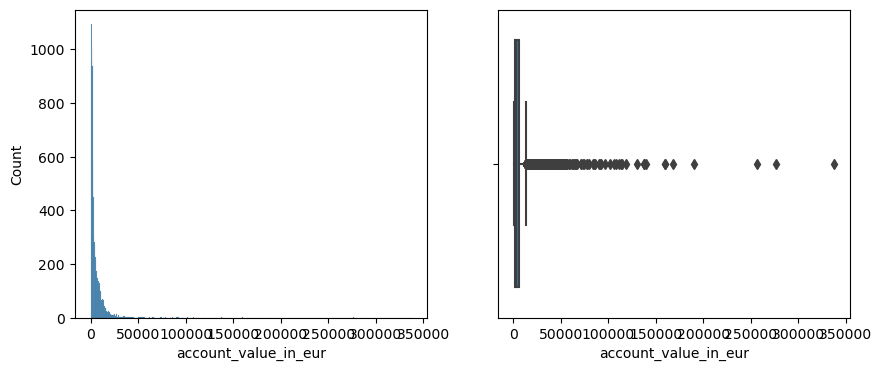

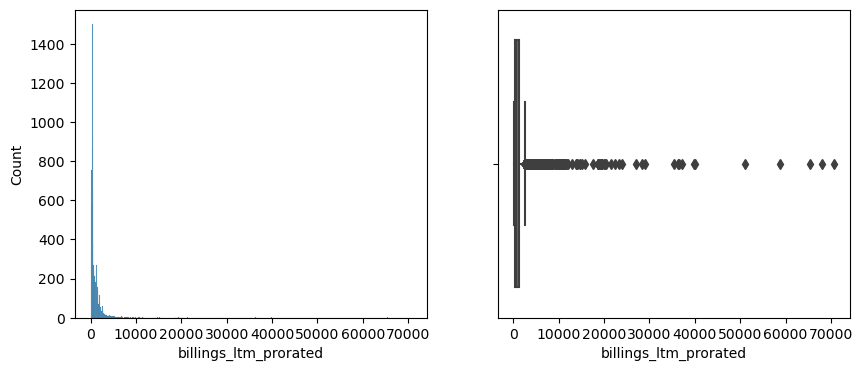

In [27]:
# Visualize the distribution of each variable
numerical = sample_df.select_dtypes(include=['float64', 'int64'])

for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=sample_df, x=col, ax=ax[0])
    sns.boxplot(data=sample_df, x=col, ax=ax[1])

As we can see from the above histogram of our dataset, we can gather some information below about our data distribution of each variable:

* **child_mort**: Have right-skewed distribution.
* **exports**: Have right-skewed distribution.
* **health**: Have right-skewed distribution.
* **import**: Have right-skewed distribution.
* **income**: Have right-skewed distribution.
* **inflation**: Have right-skewed distribution.
* **life_expec**: Have left-skewed distribution.
* **total_fer**: Have right-skewed distribution.
* **gdpp**: Have right-skewed distribution.

In [37]:
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [38]:
for col in numerical:
    apply_log1p_transformation(sample_df, col)

In [41]:
# Select columns starting with 'log_' using list comprehension and filter
prefix = 'log_'
log_columns = [col for col in sample_df.columns if col.startswith(prefix)]

# Get the subset of the DataFrame with the selected columns
log_df = sample_df[log_columns]

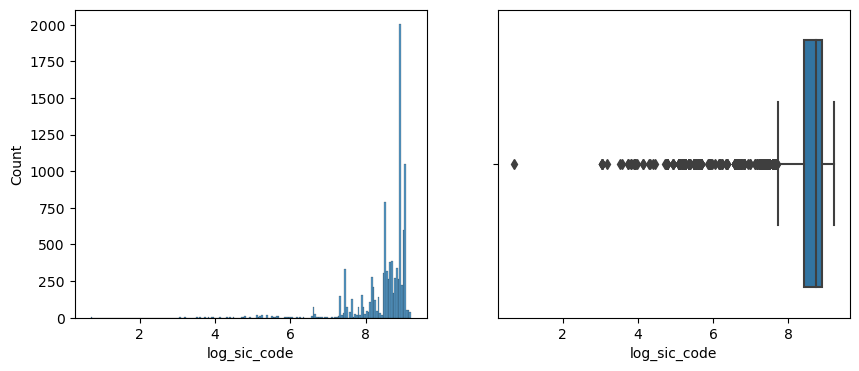

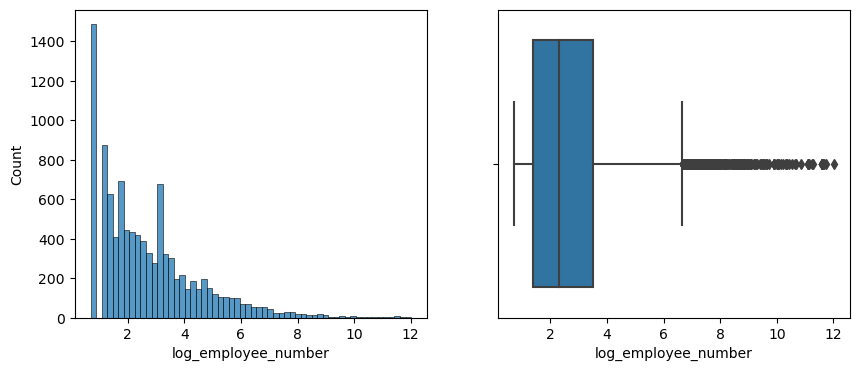

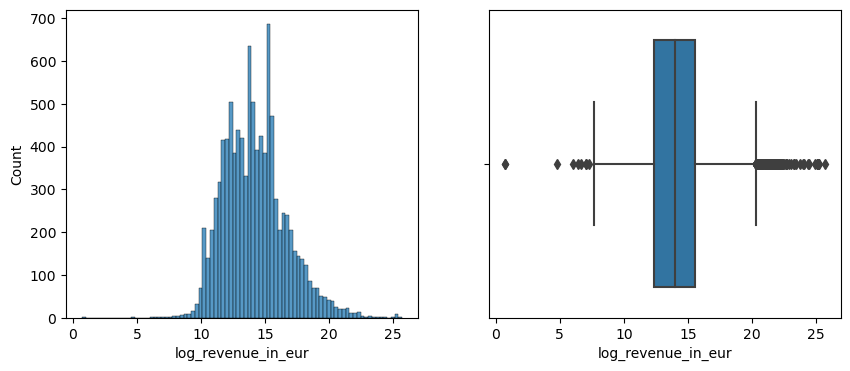

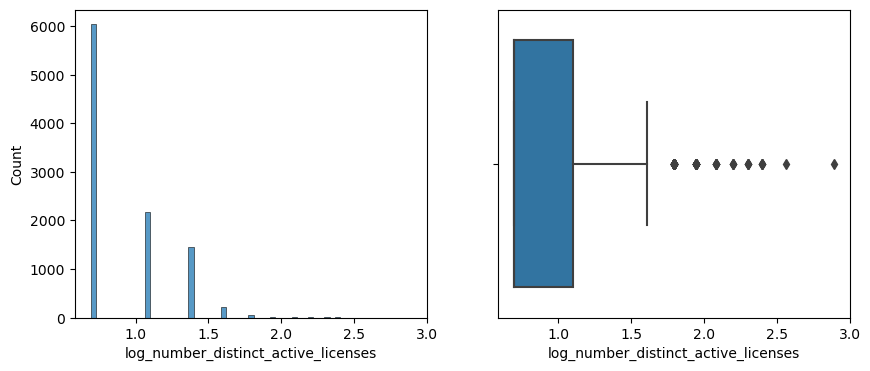

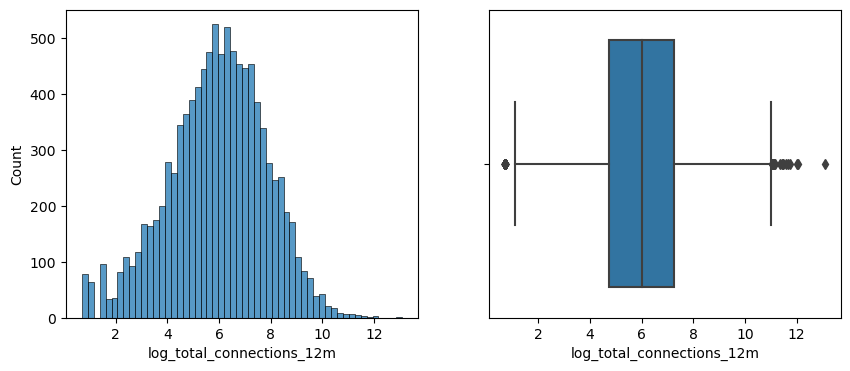

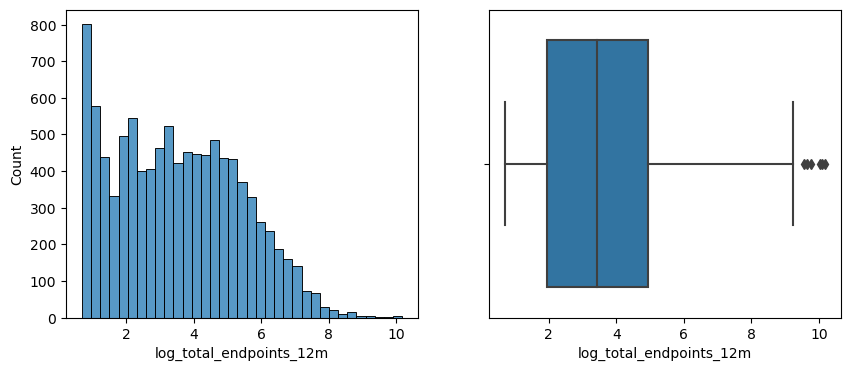

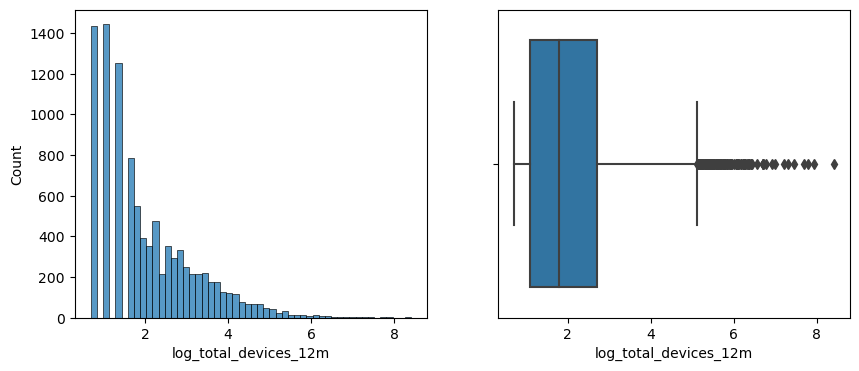

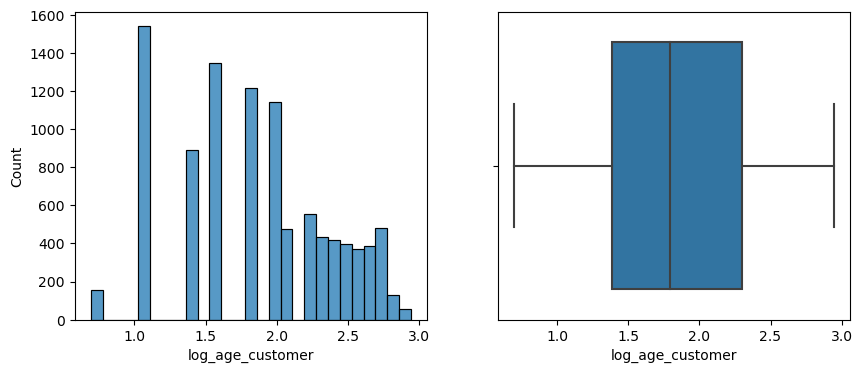

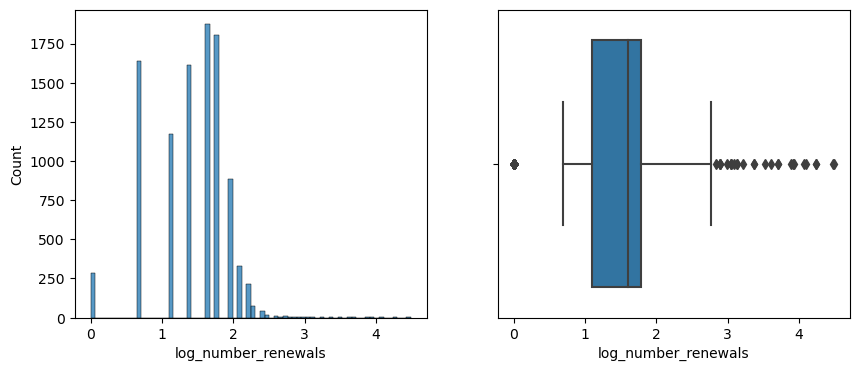

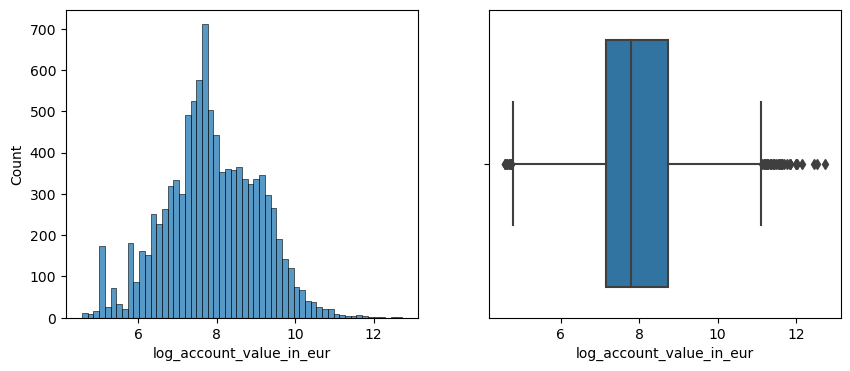

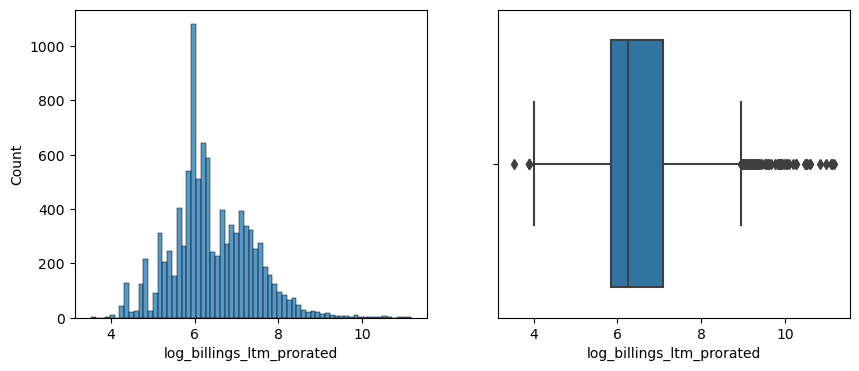

In [42]:
for col in log_columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=sample_df, x=col, ax=ax[0])
    sns.boxplot(data=sample_df, x=col, ax=ax[1])

In [40]:
log_df.head(10)

log_sic_code  log_employee_number  log_revenue_in_eur  \
42083      8.698514             0.693147           12.106368   
71825      8.667852             3.465736           15.584172   
99535      8.292549             6.111467           18.370450   
47879      9.063232             1.791759           11.524795   
36734      8.614683             4.736198           18.309056   
48636      8.980801             2.772589           14.293670   
59566      8.416931             1.386294           12.208046   
44826      9.072571             4.317488           15.753590   
51584      9.074979             0.693147           10.736418   
4368       8.526351             2.197225           13.436311   

       log_number_distinct_active_licenses  log_total_connections_12m  \
42083                             0.693147                   5.564520   
71825                             0.693147                   8.358666   
99535                             0.693147                   3.931826   
47879                             1.098612                   7.389564   
36734                             0.693147                   5.081404   
48636                             0.693147                   6.033086   
59566                             0.693147                   1.609438   
44826                             0.693147                   4.927254   
51584                             0.693147                   5.739793   
4368                              1.098612                   8.934192   

       log_total_endpoints_12m  log_total_devices_12m  log_age_customer  \
42083                 3.091042               2.484907          1.609438   
71825                 6.302619               3.496508          1.609438   
99535                 3.135494               1.791759          1.609438   
47879                 4.653960               3.688879          2.397895   
36734                 3.850148               1.386294          1.098612   
48636                 2.484907               1.098612          1.098612   
59566                 1.098612               0.693147          1.386294   
44826                 3.218876               2.197225          1.609438   
51584                 0.693147               1.098612          1.791759   
4368                  6.734592               2.995732          2.639057   

       log_number_renewals  log_account_value_in_eur  \
42083             1.386294                  7.263049   
71825             1.386294                  8.299169   
99535             1.386294                  9.077266   
47879             2.302585                  9.234889   
36734             0.693147                  6.672792   
48636             0.693147                  6.865474   
59566             1.098612                  7.217568   
44826             1.098612                  8.079184   
51584             1.609438                  6.388561   
4368              1.609438                  8.970632   

       log_billings_ltm_prorated  
42083                   5.980909  
71825                   6.966977  
99535                   7.602990  
47879                   7.077346  
36734                   5.980909  
48636                   6.173369  
59566                   6.117612  
44826                   6.866725  
51584                   4.785824  
4368                    7.202639

In [5]:
# Separate numerical features
num_data = df.select_dtypes(include=['float64', 'int64'])

# Combining the account_id column and numerical features
id_column = df['account_id']
data = pd.concat([id_column, num_data], axis=1)

In [12]:
numerical_features = ['account_id', 'companydataprovider_employeenumber', 'companydataprovider_revenue_in_eur', 'number_distinct_active_licenses',
       'total_connections_12m', 'total_endpoints_12m', 'total_devices_12m', 'days_from_last_invoice', 'age_customer', 'number_renewals', 
       'number_total_invoices', 'account_value_in_eur', 'revenue_last_12_month', 'years_purchased', 'billings_ltm_prorated']

In [14]:
data = data[numerical_features].copy()

In [15]:
filtered_df = data[(data['total_connections_12m'] > 0) & (data['total_endpoints_12m'] > 0) & (data['total_devices_12m'] > 0)]

In [18]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17504 entries, 2 to 49998
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   account_id                          17504 non-null  object 
 1   companydataprovider_employeenumber  17504 non-null  float64
 2   companydataprovider_revenue_in_eur  17504 non-null  float64
 3   number_distinct_active_licenses     17504 non-null  int64  
 4   total_connections_12m               17504 non-null  int64  
 5   total_endpoints_12m                 17504 non-null  int64  
 6   total_devices_12m                   17504 non-null  int64  
 7   days_from_last_invoice              17504 non-null  int64  
 8   age_customer                        17504 non-null  int64  
 9   number_renewals                     17504 non-null  int64  
 10  number_total_invoices               17504 non-null  int64  
 11  account_value_in_eur                17504

In [19]:
filtered_df

account_id  \
2      8451D3C3-FC1A-E411-80D3-005056846F2F   
3      B6B0B074-213F-ED11-9DB0-000D3ADEAD35   
4      3151AAFA-F21A-E411-80D3-005056846F2F   
5      7CA97D7A-A1F0-EC11-BB3D-000D3AB57339   
8      583B0A8A-C417-EC11-B6E6-000D3ADC1859   
...                                     ...   
49969  9DC5CDED-C898-ED11-AAD1-000D3ADEA83D   
49973  D0B6E4F9-E81A-E411-80D3-005056846F2F   
49981  8CD2F113-BF75-EB11-A812-000D3AB25E8C   
49994  95C51C1D-A4D6-E711-80EF-005056844077   
49998  952309B8-21A5-E811-8108-005056844077   

       companydataprovider_employeenumber  companydataprovider_revenue_in_eur  \
2                                    52.0                          15379307.0   
3                                     3.0                             82742.0   
4                                   242.0                          15454197.0   
5                                     7.0                            830000.0   
8                                   385.0                           4320000.0   
...                                   ...                                 ...   
49969                                 9.0                           3111000.0   
49973                               105.0                          18900000.0   
49981                                 7.0                            930779.0   
49994                                 5.0                            954000.0   
49998                                 1.0                             26294.0   

       number_distinct_active_licenses  total_connections_12m  \
2                                    3                   3349   
3                                    1                     78   
4                                    1                    243   
5                                    1                    944   
8                                    1                     76   
...                                ...                    ...   
49969                                1                    297   
49973                                3                   3512   
49981                                1                    561   
49994                                2                    775   
49998                                1                    668   

       total_endpoints_12m  total_devices_12m  days_from_last_invoice  \
2                      611                 21                      85   
3                        4                  2                      57   
4                       33                  3                     149   
5                        5                  7                     157   
8                        1                  3                      62   
...                    ...                ...                     ...   
49969                    7                 16                     161   
49973                 1578                168                     185   
49981                    9                  2                     272   
49994                   89                 22                     293   
49998                  273                  4                      95   

       age_customer  number_renewals  number_total_invoices  \
2                13                2                      6   
3                 1                1                      2   
4                12                5                      7   
5                 1                1                      2   
8                 2                2                      3   
...             ...              ...                    ...   
49969             0                0                      2   
49973            13                7                     12   
49981             2                2                      3   
49994            10                4                     15   
49998             5                5                      6   

       account_value_in_eur  revenue_last_12_month  years_purchased  \
2        

In [20]:
filtered_df.describe()

companydataprovider_employeenumber  companydataprovider_revenue_in_eur  \
count                        17504.000000                        1.750400e+04   
mean                           201.150023                        6.173869e+07   
std                           3700.381289                        1.109982e+09   
min                              0.000000                        0.000000e+00   
25%                              4.000000                        2.950000e+05   
50%                             11.000000                        1.375010e+06   
75%                             45.000000                        7.304972e+06   
max                         383000.000000                        8.684900e+10   

       number_distinct_active_licenses  total_connections_12m  \
count                     17504.000000           17504.000000   
mean                          1.713037            1818.809015   
std                           1.443277            7229.108441   
min                           1.000000               1.000000   
25%                           1.000000             108.000000   
50%                           1.000000             407.000000   
75%                           2.000000            1396.250000   
max                         125.000000          395284.000000   

       total_endpoints_12m  total_devices_12m  days_from_last_invoice  \
count         17504.000000       17504.000000            17504.000000   
mean            198.084095          21.455382              162.298789   
std            1371.538451         108.767338               94.814162   
min               1.000000           1.000000                1.000000   
25%               7.000000           2.000000               79.000000   
50%              33.000000           5.000000              164.000000   
75%             143.000000          15.000000              247.000000   
max          156015.000000        8748.000000              327.000000   

       age_customer  number_renewals  number_total_invoices  \
count  17504.000000     17504.000000           17504.000000   
mean       5.449154         3.833924               6.967893   
std        3.938906         5.172222               6.907382   
min        0.000000         0.000000               1.000000   
25%        2.000000         2.000000               4.000000   
50%        4.000000         4.000000               6.000000   
75%        8.000000         5.000000               9.000000   
max       17.000000       127.000000             150.000000   

       account_value_in_eur  revenue_last_12_month  years_purchased  \
count          17504.000000           17504.000000     17504.000000   
mean            6215.055788            1457.704246     13375.593921   
std            14848.424177            5551.162652     13131.108190   
min               76.720000               0.000000      2023.000000   
25%             1446.770000             391.520000      8068.750000   
50%             2814.610000             576.140000     10106.000000   
75%             7113.865000            1399.000000     16156.000000   
max           715235.440000          288118.540000    260337.000000   

       billings_ltm_prorated  
count           17504.000000  
mean             1468.900094  
std              5311.161663  
min                10.310000  
25%               394.800000  
50%               633.975000  
75%              1475.605000  
max            457708.280000

In [25]:
fig = px.scatter_matrix(filtered_df.drop("account_id",axis=1),
                        width=1200,
                        height=1600)
fig.show()

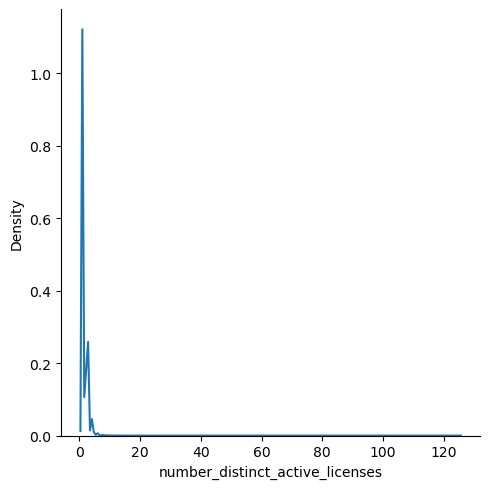

In [32]:
sns.displot(filtered_df, x="number_distinct_active_licenses", kind="kde")

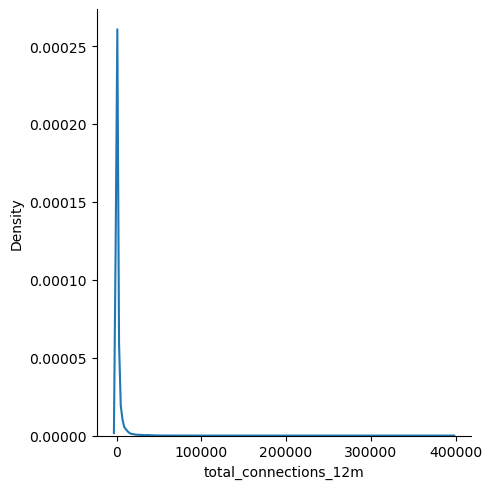

In [26]:
sns.displot(filtered_df, x="total_connections_12m", kind="kde")

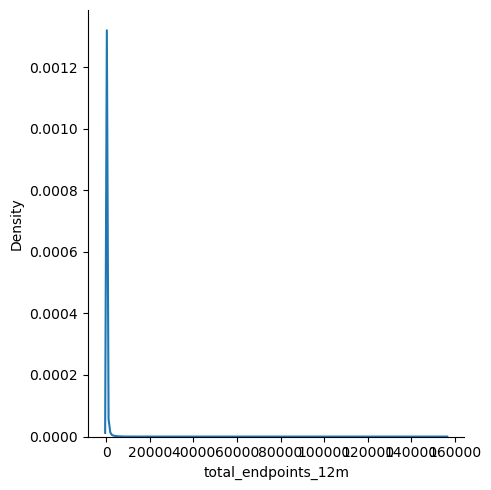

In [27]:
sns.displot(filtered_df, x="total_endpoints_12m", kind="kde")

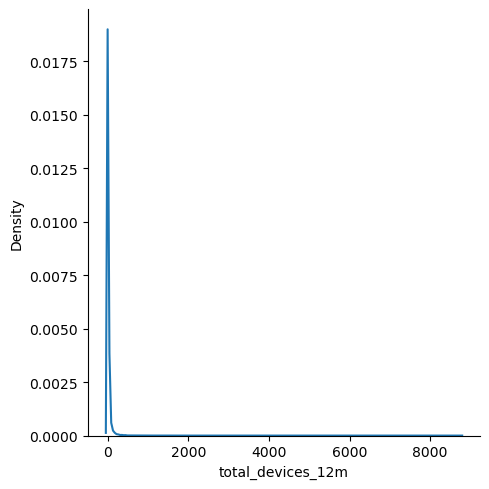

In [28]:
sns.displot(filtered_df, x="total_devices_12m", kind="kde")

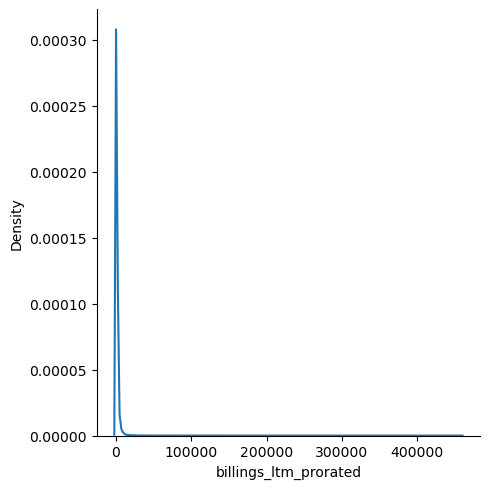

In [29]:
sns.displot(filtered_df, x="billings_ltm_prorated", kind="kde")

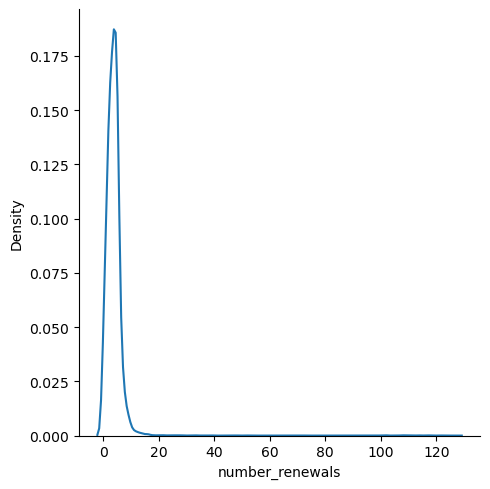

In [33]:
sns.displot(filtered_df, x="number_renewals", kind="kde")

## Scaling

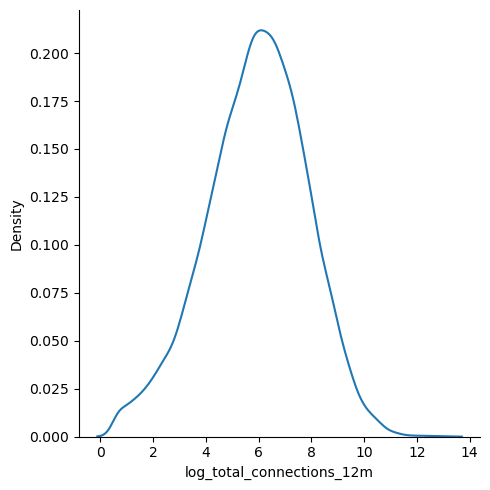

In [38]:

sns.displot(filtered_df, x="log_total_connections_12m", kind="kde")

C:\Users\INT005626\AppData\Local\Temp\1\ipykernel_13664\1476938113.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



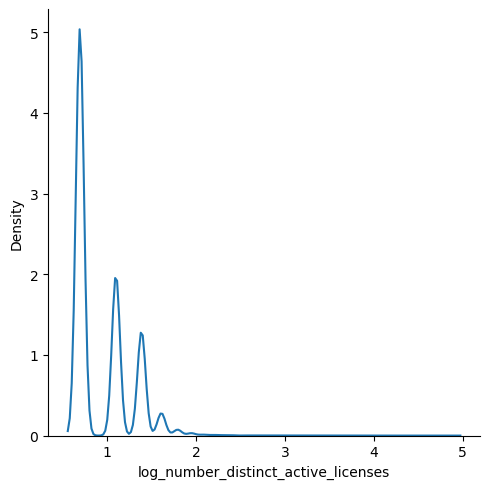

In [39]:
apply_log1p_transformation(filtered_df, "number_distinct_active_licenses")
sns.displot(filtered_df, x="log_number_distinct_active_licenses", kind="kde")

C:\Users\INT005626\AppData\Local\Temp\1\ipykernel_13664\1476938113.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



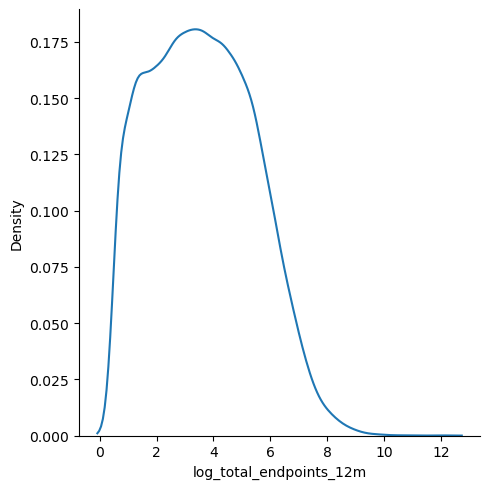

In [40]:
apply_log1p_transformation(filtered_df, "total_endpoints_12m")
sns.displot(filtered_df, x="log_total_endpoints_12m", kind="kde")

C:\Users\INT005626\AppData\Local\Temp\1\ipykernel_13664\1476938113.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



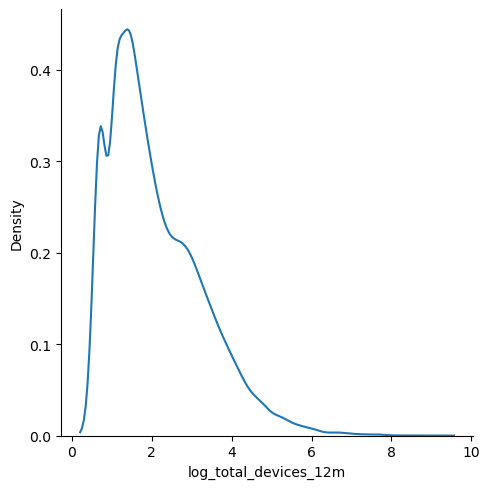

In [41]:
apply_log1p_transformation(filtered_df, "total_devices_12m")
sns.displot(filtered_df, x="log_total_devices_12m", kind="kde")

C:\Users\INT005626\AppData\Local\Temp\1\ipykernel_13664\1476938113.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



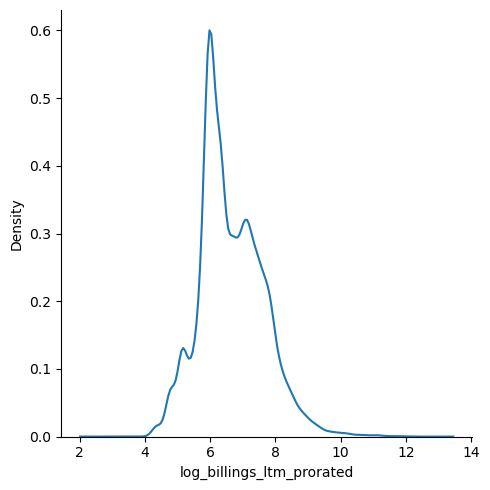

In [42]:
apply_log1p_transformation(filtered_df, "billings_ltm_prorated")
sns.displot(filtered_df, x="log_billings_ltm_prorated", kind="kde")

C:\Users\INT005626\AppData\Local\Temp\1\ipykernel_13664\1476938113.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



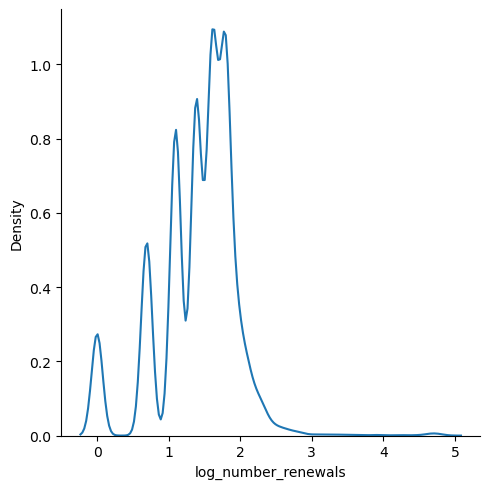

In [43]:
apply_log1p_transformation(filtered_df, "number_renewals")
sns.displot(filtered_df, x="log_number_renewals", kind="kde")